In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
df.drop(columns=['Booking_ID'] , inplace=True)

In [9]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [10]:
df.shape

(29020, 18)

In [11]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(7661)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(21359, 18)

In [15]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [18]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

### Our data is imbalanced

In [26]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved','market_segment_type','repeated_guest','booking_status']

num_cols = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','arrival_year','arrival_month','arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

#### DATA ANALYSIS

In [27]:
data = df.copy()

In [28]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### UNIVARIATE ANALYSIS

In [29]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes = [axes]

    for i,column in enumerate(num_features):
        sns.histplot(data=df, x=column, kde=True, ax=axes[i][0] , palette='Blues')
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette='Blues')
        axes[i][1].set_title(f"Boxplot for {column}")

    plt.tight_layout()
    plt.show()

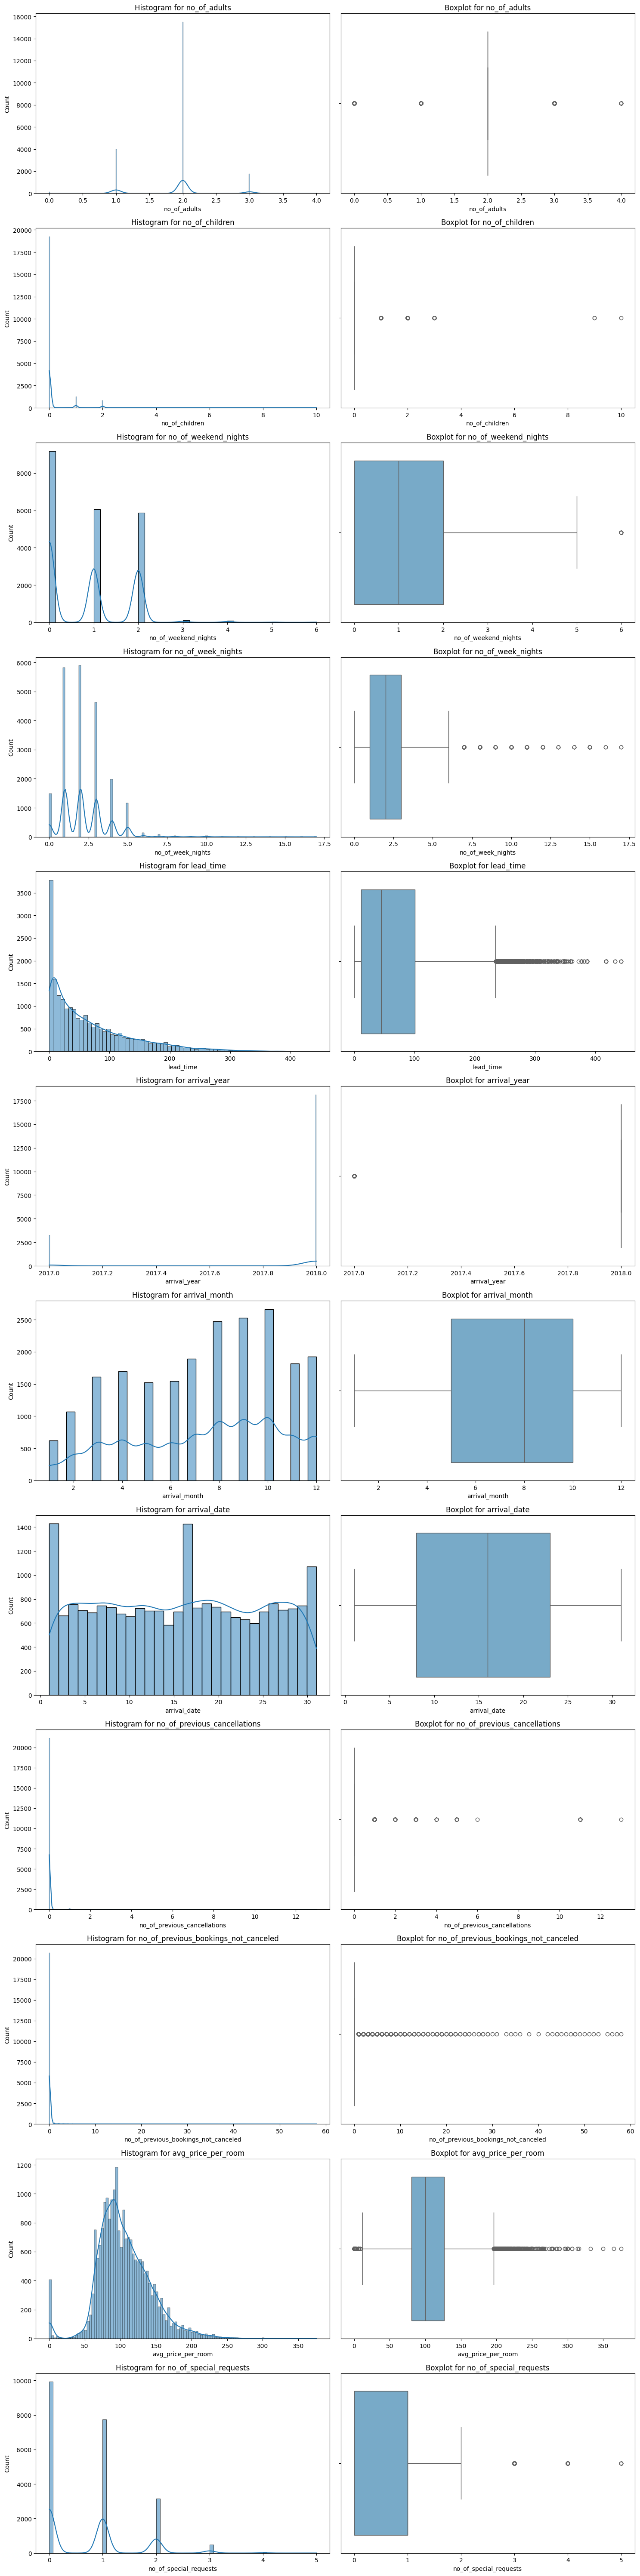

In [23]:
num_plot_dist(data, num_cols)

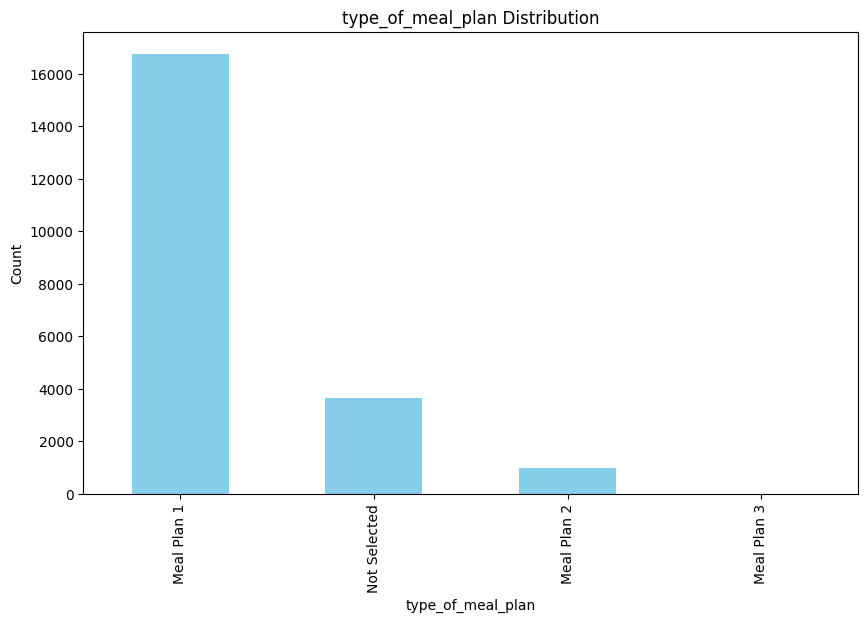

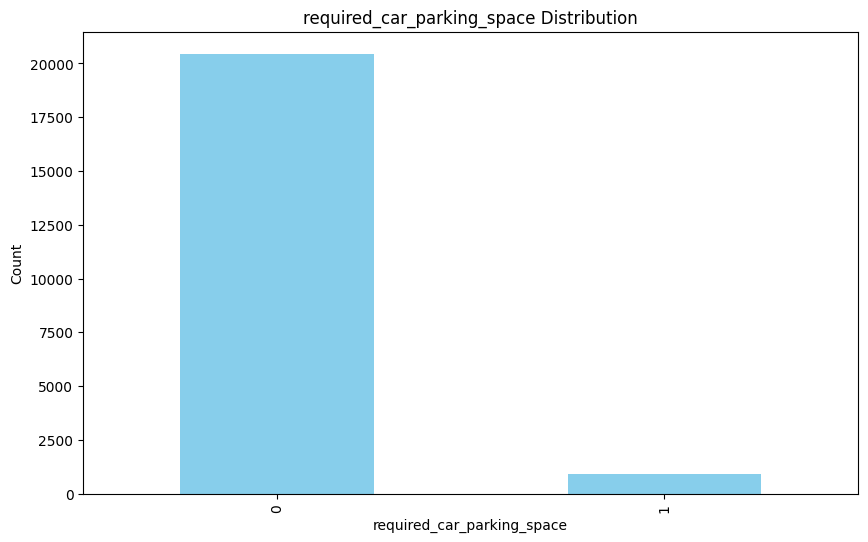

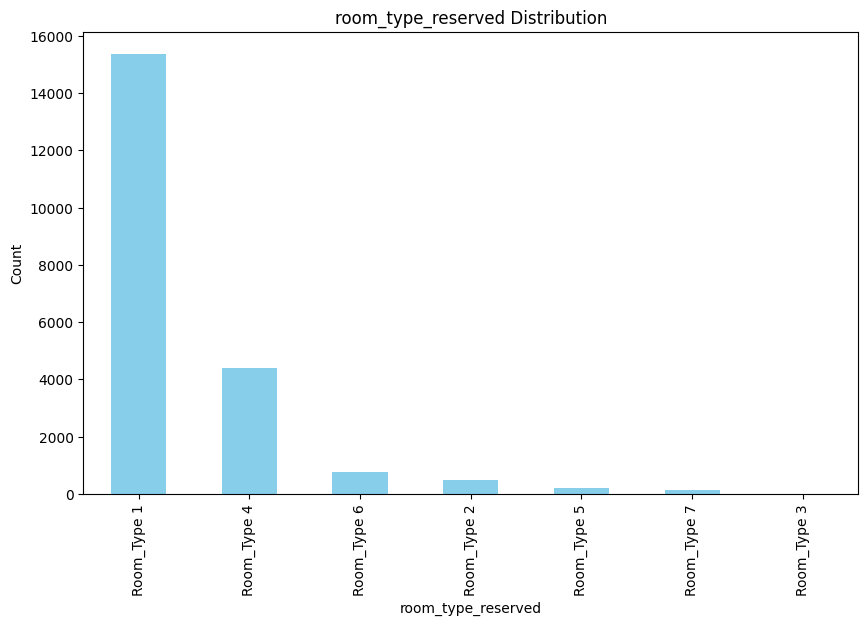

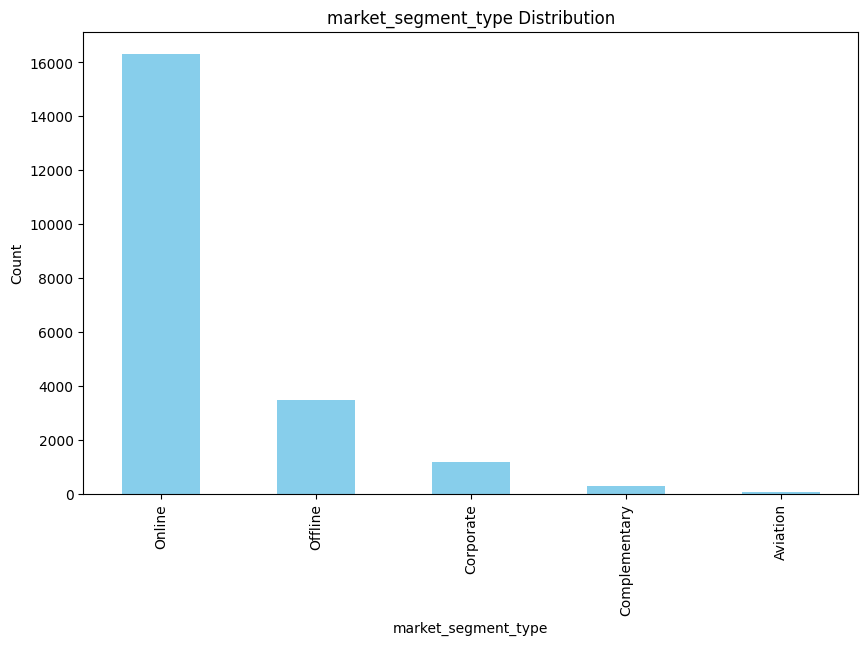

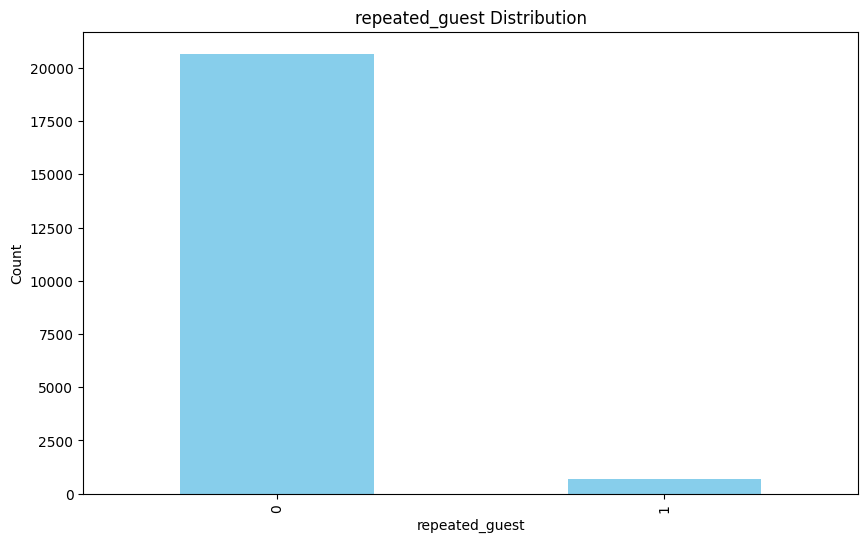

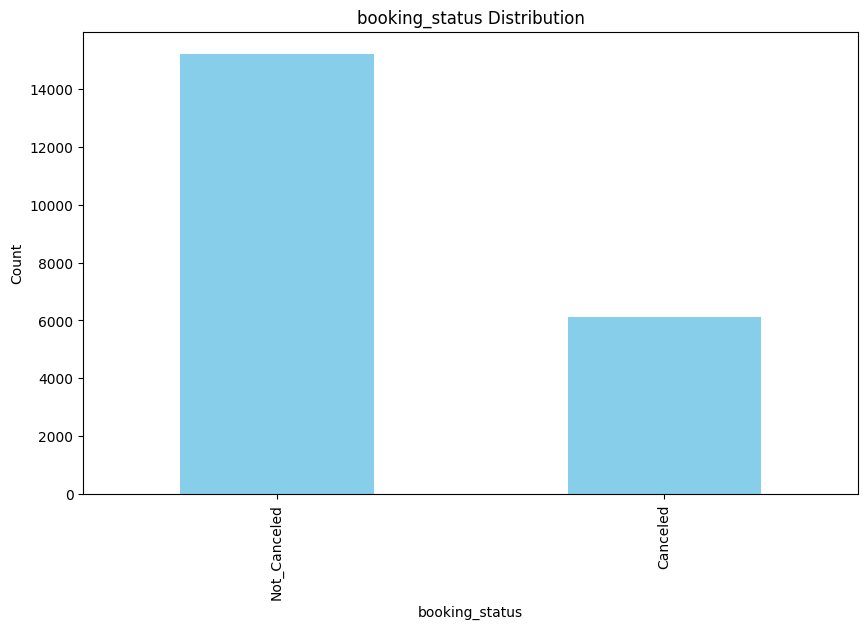

In [30]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()

#### BIVARIATE ANALYSIS

In [32]:
def plot_bivariate_num(df, target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i,column in enumerate(num_features):
        sns.boxplot(data=df, x=target, y=column, ax=axes[i], palette='Blues')
        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()

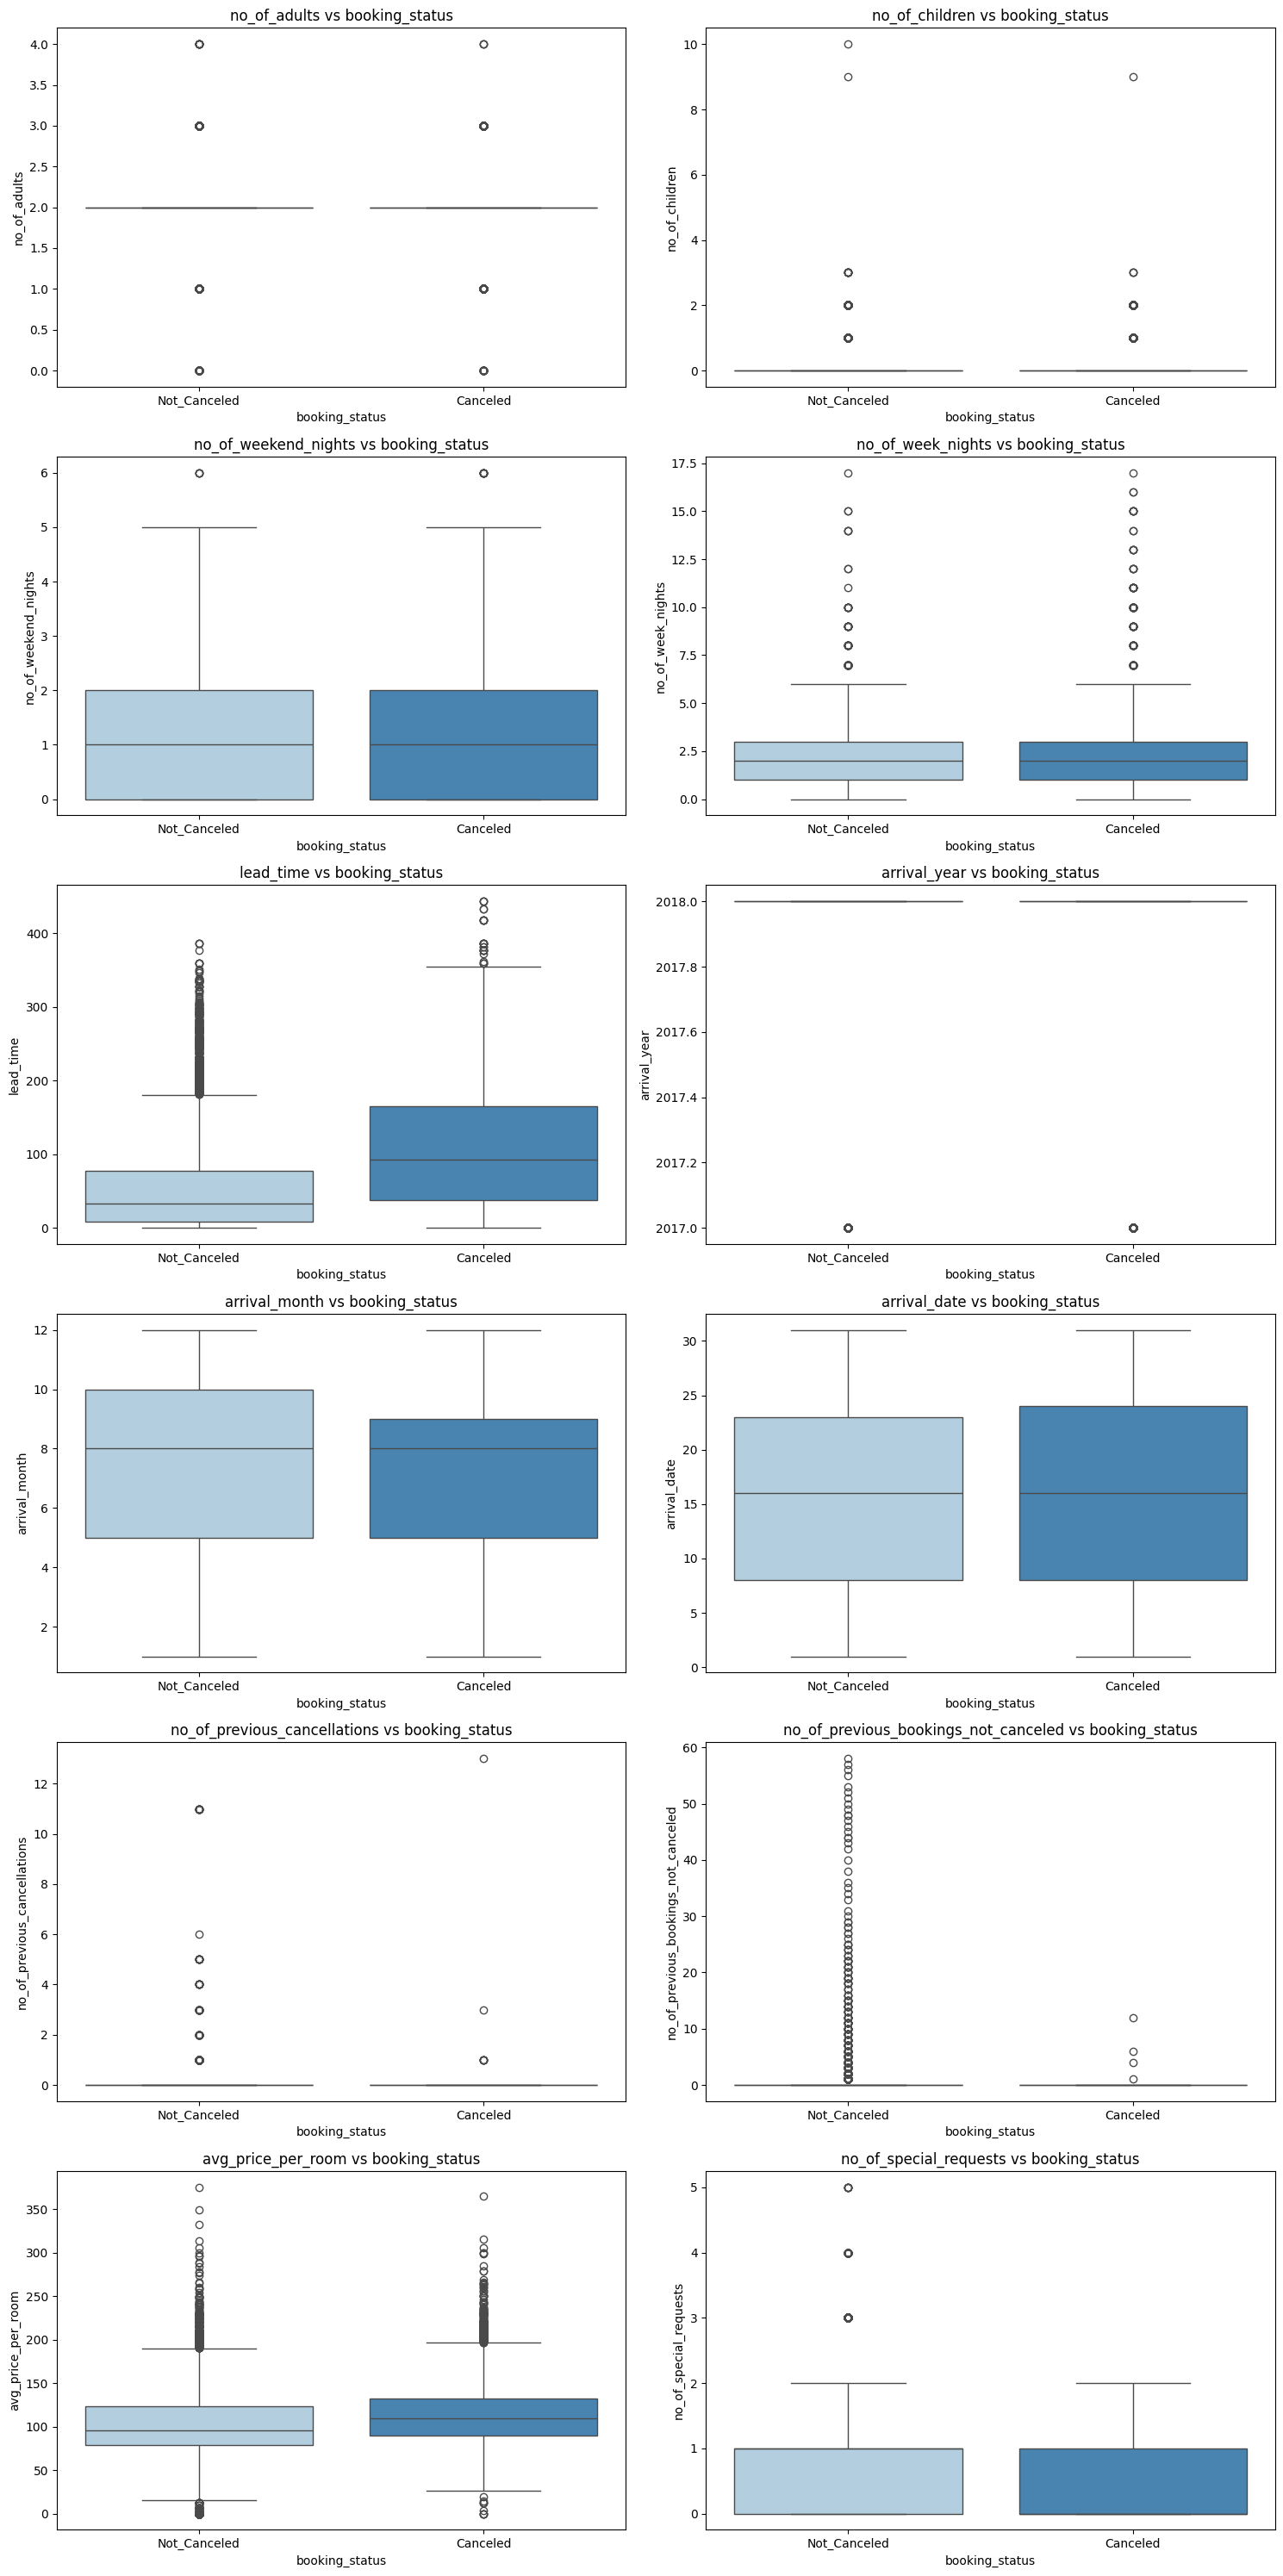

In [33]:
plot_bivariate_num(data, 'booking_status', num_cols)

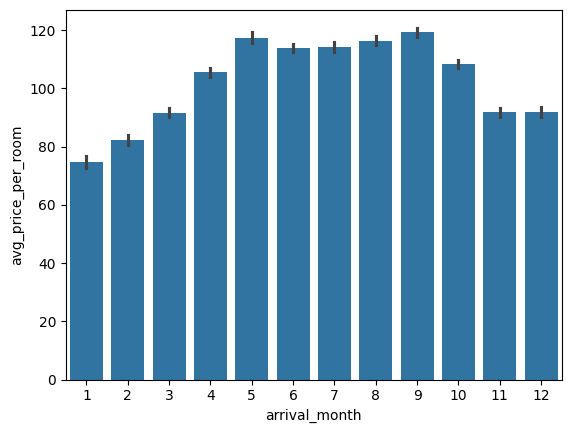

In [34]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [35]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(data=df, x=feature, hue=target, ax=axes[i], palette='Set2')
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

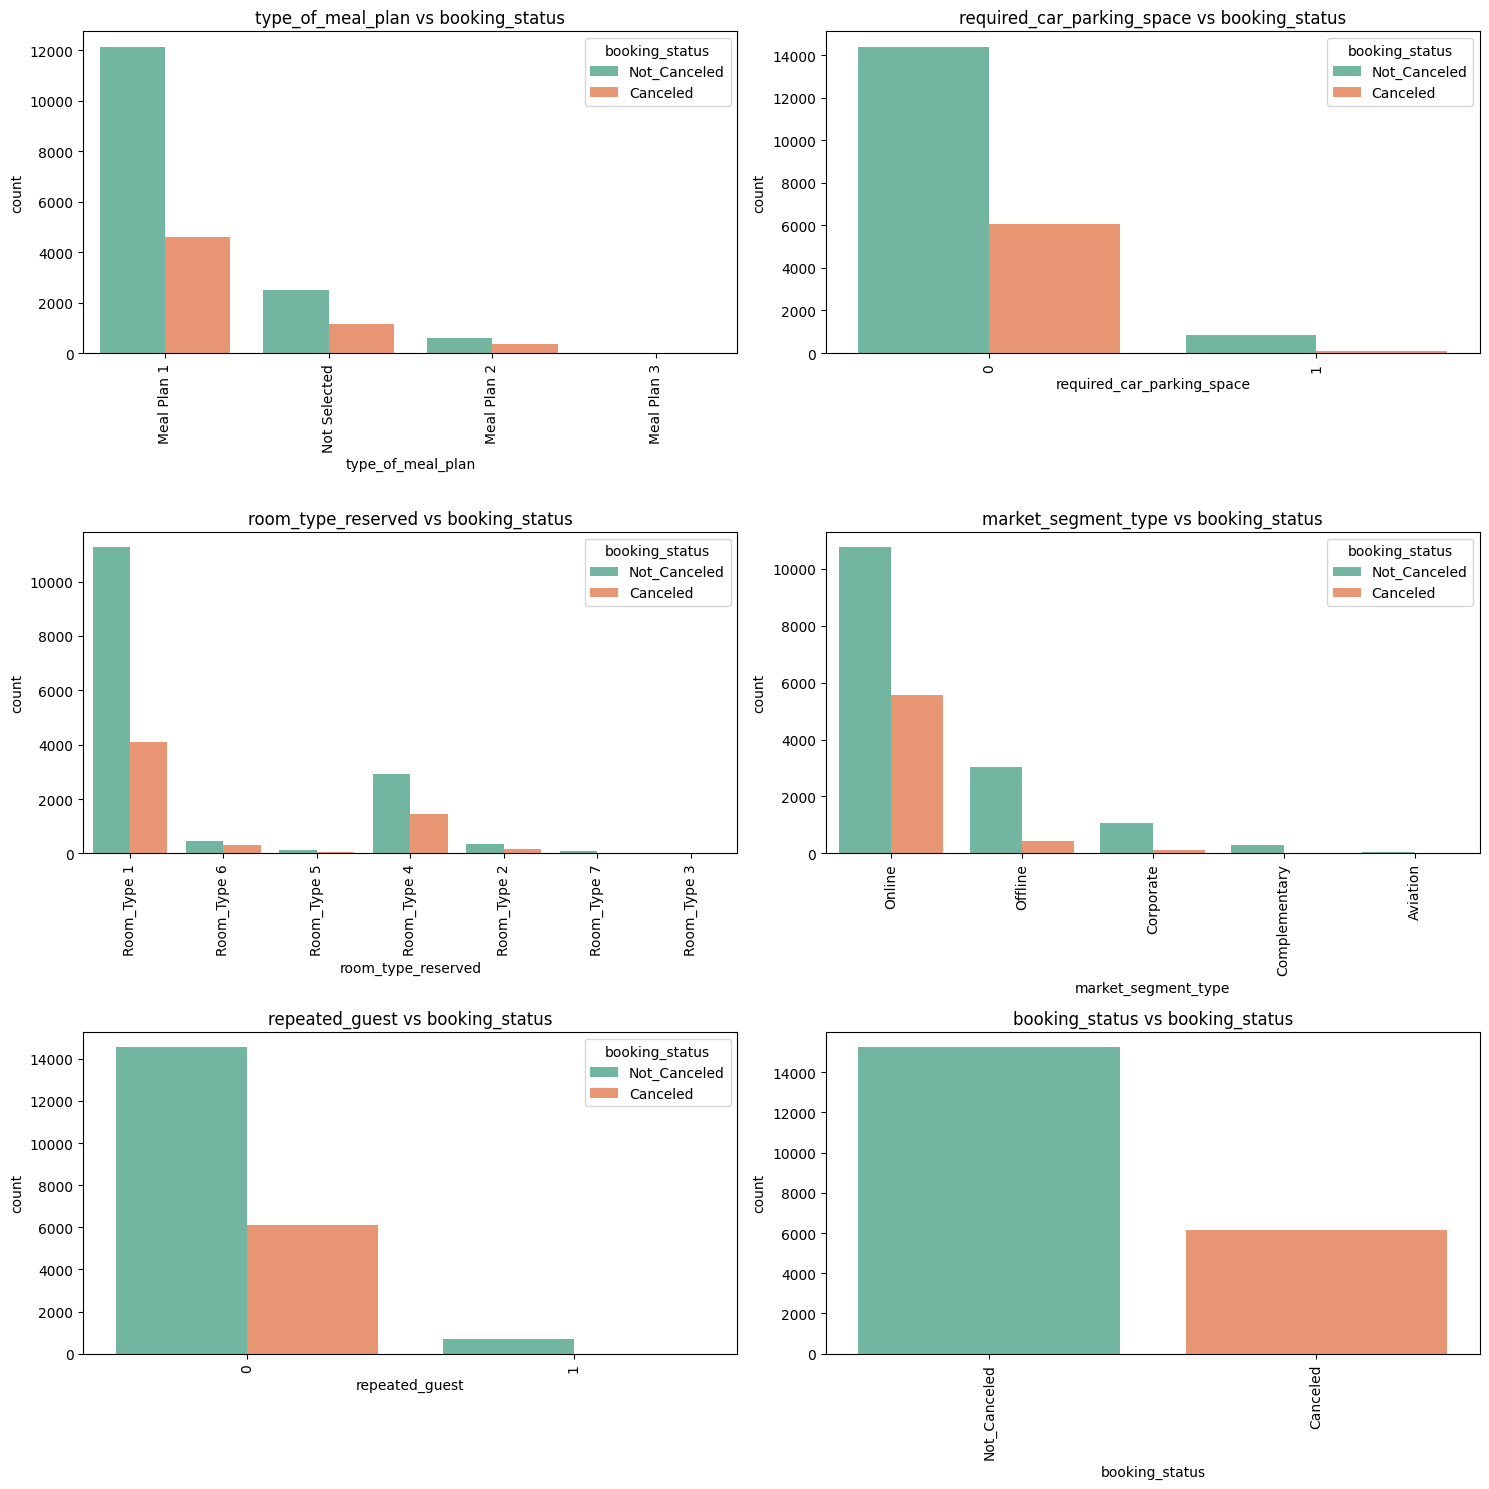

In [36]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

#### DATA PROCESSING

In [37]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [39]:
#### Label Encoding

from sklearn.preprocessing import LabelEncoder

In [41]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [42]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [43]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


### Multicollinearity


In [44]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.6 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.6 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.6 MB 7.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.6 MB 7.5 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/9.6 MB 7.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.6 MB 7.6 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.6 MB 7.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.6 MB 7.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.6 MB 8.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.6 MB 7.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 7.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.6/9.6 MB 7.5 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [47]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [48]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


#### Our data don't have any multicollinearity

In [49]:
corr = df.corr()

<Axes: >

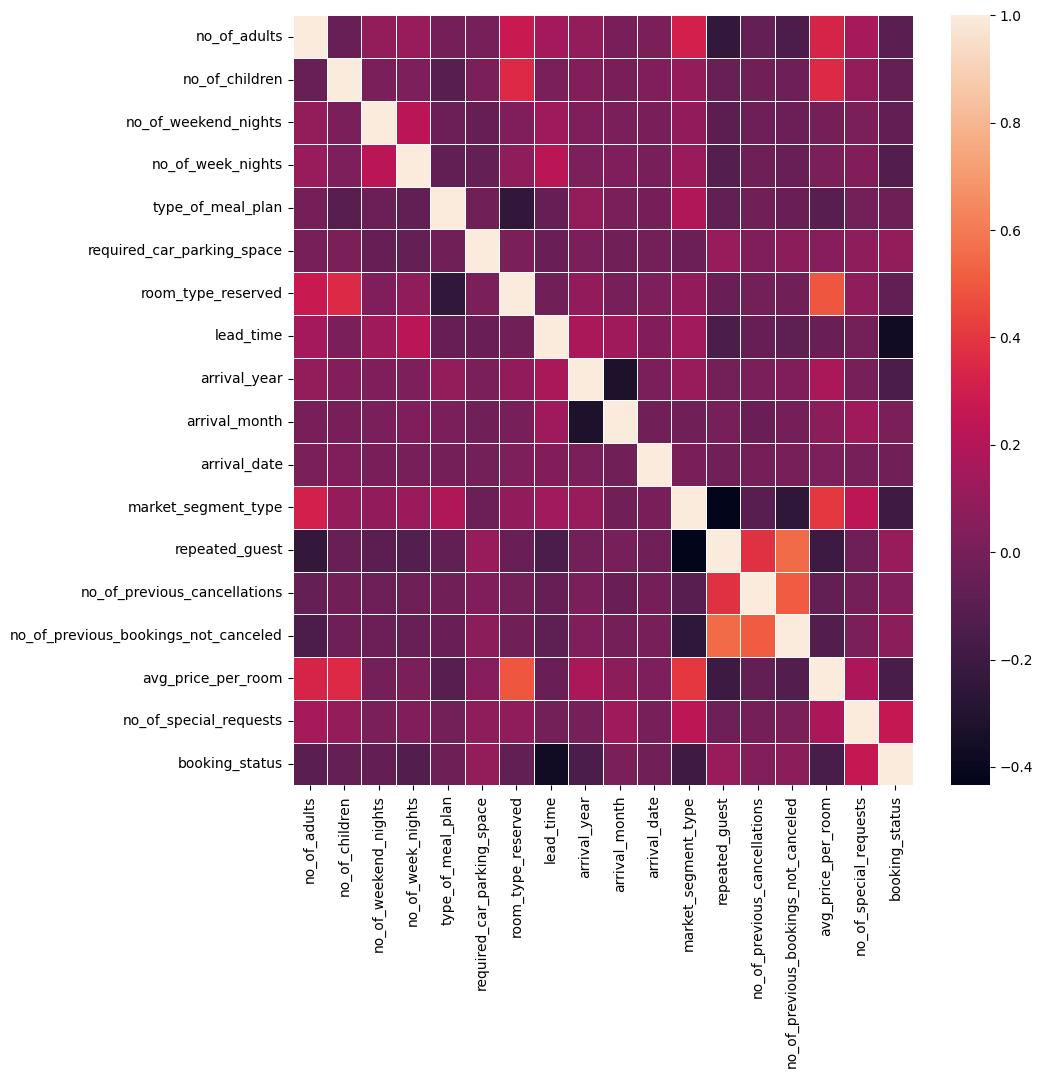

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=0.5)


In [51]:
#### Skewness

In [53]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [54]:
for col in df.columns:
    if skewness[col] > 0.5:
        df[col] = np.log1p(df[col])

In [55]:
#### Imbalanced data

In [56]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [57]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [58]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [59]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   -------------------------------- ------- 194.6/240.0 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------  235.5/240.0 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 240.0/240.0 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X, y)

In [63]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [64]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [65]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0.693147,1.098612,0.693147,0.0,0.0,0.0,3.295837,2017,10,17,4,0.0,0.0,0.0,5.087596,0.000000,1
1,2,0.693147,0.693147,0.693147,0.0,0.0,0.0,4.595120,2018,7,16,4,0.0,0.0,0.0,4.808111,1.098612,1
2,2,0.000000,0.000000,1.386294,0.0,0.0,0.0,6.073045,2018,9,8,3,0.0,0.0,0.0,4.262680,0.000000,0
3,2,0.000000,1.098612,1.791759,0.0,0.0,0.0,5.278115,2018,8,8,3,0.0,0.0,0.0,4.293878,0.000000,1
4,1,0.000000,0.000000,1.098612,0.0,0.0,0.0,5.241747,2018,6,15,3,0.0,0.0,0.0,4.875197,0.000000,0


In [66]:
balanced_df.shape

(30462, 18)

In [67]:
df = balanced_df.copy()

In [68]:
df.shape

(30462, 18)

#### Feature Selection

In [69]:
len(df.columns)

18

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [72]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
feature_importance = model.feature_importances_

In [74]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [77]:
top_features_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [80]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [81]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_date,arrival_month,no_of_week_nights,market_segment_type,no_of_weekend_nights,arrival_year,room_type_reserved,booking_status
0,3.295837,0.000000,5.087596,17,10,0.693147,4,1.098612,2017,0.0,1
1,4.595120,1.098612,4.808111,16,7,0.693147,4,0.693147,2018,0.0,1
2,6.073045,0.000000,4.262680,8,9,1.386294,3,0.000000,2018,0.0,0
3,5.278115,0.000000,4.293878,8,8,1.791759,3,1.098612,2018,0.0,1
4,5.241747,0.000000,4.875197,15,6,1.098612,3,0.000000,2018,0.0,0


In [83]:
len(top_10_df.columns)

11

In [84]:
df=top_10_df.copy()

#### MODEL SELECTION

In [85]:
!pip install xgboost lightgbm 

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 217.9 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.5 MB 465.5 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.5 MB 1.8 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 3.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.5 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.5 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [87]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [88]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

In [90]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [91]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1576
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [92]:
metrics_df = pd.DataFrame(metrics)

In [93]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.905301,0.905322,0.905301,0.905297
1,Logistic Regression,0.767438,0.767686,0.767438,0.767419
2,Gradient Boosting,0.873297,0.873784,0.873297,0.873235
3,Support Vector Classifier,0.496143,0.246158,0.496143,0.329057
4,Decision Tree,0.846709,0.847240,0.846709,0.846678
5,Naive Bayes,0.702281,0.733619,0.702281,0.692633
6,KNN,0.801576,0.808487,0.801576,0.800607
7,XGBoost,0.896110,0.896296,0.896110,0.896088
8,LightGBM,0.896767,0.897404,0.896767,0.896707
9,AdaBoost,0.807812,0.807886,0.807812,0.807783


In [94]:
#### TRAIN OUR RF MODEL

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [95]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [96]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
rf = RandomForestClassifier(random_state=42)

In [102]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True, False]
}

In [103]:
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=params_dist,
    n_iter=5, 
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
    )

In [104]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.4s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....00200D402B6D0>, 'min_samples_leaf': <scipy.stats....00200C4B72B10>, 'min_samples_split': <scipy.stats....00200C4B70B90>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [105]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [106]:
best_rf_model = random_search.best_estimator_

In [107]:
y_pred = best_rf_model.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [109]:
accuracy

0.9057935335631052

In [110]:
precision

0.9058909693781592

In [111]:
recall

0.9057935335631052

In [112]:
f1

0.9057812232193698

In [113]:
### Save this model

import joblib
joblib.dump(best_rf_model, 'random_forest.pkl')

['random_forest.pkl']

In [114]:
loaded_model = joblib.load('random_forest.pkl')

In [115]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_date,arrival_month,no_of_week_nights,market_segment_type,no_of_weekend_nights,arrival_year,room_type_reserved
4157,5.252273,0.693147,4.5486,8,9,1.791759,4,1.098612,2017,0.0


In [116]:
new_data = np.array([5.252273,	0.693147,	4.5486,	8,	9,	1.791759,	4,	1.098612,	2017,	0.0]).reshape(1, -1)

In [117]:
predictions = loaded_model.predict(new_data)

In [118]:
predictions

array([1])